KHAI BÁO CÁC THƯ VIỆN CẦN THIẾT

In [1]:
import numpy as np
import pandas as pd 

ĐỌC DỮ LIỆU

In [2]:
telecom_cust = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

EDA, KHÁM PHÁ VÀ LÀM SẠCH DỮ LIỆU

In [3]:
telecom_cust.shape

(7043, 21)

In [4]:
telecom_cust.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [5]:
telecom_cust.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

ta thấy rằng cột TotalCharges có sự khác biệt về kiểu dữ liệu, sau đây tôi sẽ khai thác cột này

In [6]:
telecom_cust.TotalCharges = pd.to_numeric(telecom_cust.TotalCharges, errors='coerce')
telecom_cust.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
telecom_cust.dropna()
df2 = telecom_cust.iloc[:,1:]
df2['Churn'].replace(to_replace='Yes', value=1)
df2['Churn'].replace(to_replace='No',  value=0)
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,29.85,29.85,True,False,False,True,True,False,...,False,False,False,True,False,False,True,False,True,False
1,0,34,56.95,1889.50,False,True,True,False,True,False,...,True,False,True,False,False,False,False,True,True,False
2,0,2,53.85,108.15,False,True,True,False,True,False,...,False,False,False,True,False,False,False,True,False,True
3,0,45,42.30,1840.75,False,True,True,False,True,False,...,True,False,True,False,True,False,False,False,True,False
4,0,2,70.70,151.65,True,False,True,False,True,False,...,False,False,False,True,False,False,True,False,False,True


In [8]:
telecom_cust.shape

(7043, 21)

In [9]:
telecom_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
telecom_cust= telecom_cust.dropna()

In [18]:
telecom_cust.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [20]:
for col in telecom_cust.columns:
    print(f"Unique values in '{col}' column:")
    print(telecom_cust[col].nunique())
    print("\n")


Unique values in 'customerID' column:
7032


Unique values in 'gender' column:
2


Unique values in 'SeniorCitizen' column:
2


Unique values in 'Partner' column:
2


Unique values in 'Dependents' column:
2


Unique values in 'tenure' column:
72


Unique values in 'PhoneService' column:
2


Unique values in 'MultipleLines' column:
3


Unique values in 'InternetService' column:
3


Unique values in 'OnlineSecurity' column:
3


Unique values in 'OnlineBackup' column:
3


Unique values in 'DeviceProtection' column:
3


Unique values in 'TechSupport' column:
3


Unique values in 'StreamingTV' column:
3


Unique values in 'StreamingMovies' column:
3


Unique values in 'Contract' column:
3


Unique values in 'PaperlessBilling' column:
2


Unique values in 'PaymentMethod' column:
4


Unique values in 'MonthlyCharges' column:
1584


Unique values in 'TotalCharges' column:
6530


Unique values in 'Churn' column:
2




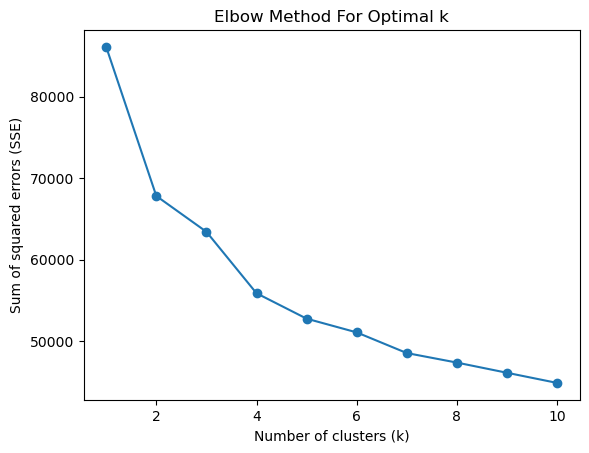

In [22]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = telecom_cust.copy()
#Loại bỏ cột 'customerID' vì nó chứa dữ liệu không phù hợp cho phân cụm
df = df.drop('customerID', axis=1)

#Mã hóa các biến định tính
label_encoder = LabelEncoder()

categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

#Chuẩn hóa các biến số học
scaler = StandardScaler()
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

#Áp dụng thuật toán K-means
sse = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow
plt.plot(k_values, sse, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of squared errors (SSE)')
plt.title('Elbow Method For Optimal k')
plt.show()


In [24]:
# Áp dụng K-means với số cụm tối ưu (giả sử chọn k = 4)
kmeans = KMeans(n_clusters=4, random_state=42)
telecom_cust['Cluster'] = kmeans.fit_predict(df)
# Xem các cụm đã được gán
telecom_cust

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Cluster
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,1
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,2
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,1
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,1


In [38]:
# Thay thế giá trị 0 thành 'No' và 1 thành 'Yes' trong cột SeniorCitizen
telecom_cust['SeniorCitizen']=telecom_cust['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})


In [40]:
telecom_cust.to_csv('clean_data.csv', index=False)